# Prepare data for training

In [1]:
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab 
from datetime import datetime, timedelta
import numpy as np
from fastai.collab import *
from fastai.tabular.all import *
from time import *

In [2]:
data = pd.read_csv(r'./charge_hourly_with_Covid_new.csv')
data

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2020-12-02 09:00:00,4.214567,2,10,NaN,False,3.0,NaN,NaN,NaN
1,2020-12-02 10:00:00,0.560625,2,11,NaN,False,3.0,4.214567,NaN,NaN
2,2020-12-02 11:00:00,0.000000,2,12,NaN,False,3.0,0.560625,4.214567,NaN
3,2020-12-02 12:00:00,0.000000,2,13,NaN,False,3.0,0.000000,0.560625,4.214567
4,2020-12-02 13:00:00,0.000558,2,14,NaN,False,3.0,0.000000,0.000000,0.560625
...,...,...,...,...,...,...,...,...,...,...
10883,2022-02-28 20:00:00,0.000000,0,21,Spring holiday,True,0.0,0.000000,0.000000,0.000925
10884,2022-02-28 21:00:00,0.000000,0,22,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10885,2022-02-28 22:00:00,0.000000,0,23,Spring holiday,True,0.0,0.000000,0.000000,0.000000
10886,2022-02-28 23:00:00,0.000000,1,0,Spring holiday,True,0.0,0.000000,0.000000,0.000000


In [3]:
data_test = pd.read_csv(r'./charge0422_hourly_with_Covid_new.csv')
data_test

,Time,Energy_kWh,weekday,hour,hols,is_hol,measure,E_1,E_2,E_3
0,2022-03-01 04:00:00,0.000000,1,5,Spring holiday,True,0,0.000000,0.000000,0.0
1,2022-03-01 05:00:00,0.000000,1,6,Spring holiday,True,0,0.000000,0.000000,0.0
2,2022-03-01 06:00:00,0.044108,1,7,Spring holiday,True,0,0.000000,0.000000,0.0
3,2022-03-01 07:00:00,7.013325,1,8,Spring holiday,True,0,0.044108,0.000000,0.0
4,2022-03-01 08:00:00,7.089000,1,9,Spring holiday,True,0,7.013325,0.044108,0.0
...,...,...,...,...,...,...,...,...,...,...
647,2022-03-28 03:00:00,0.000000,0,5,NaN,False,0,0.000000,0.000000,0.0
648,2022-03-28 04:00:00,0.000000,0,6,NaN,False,0,0.000000,0.000000,0.0
649,2022-03-28 05:00:00,0.000000,0,7,NaN,False,0,0.000000,0.000000,0.0
650,2022-03-28 06:00:00,15.496425,0,8,NaN,False,0,0.000000,0.000000,0.0


In [4]:
sequence = data['Energy_kWh'].values
sequence.shape

(10888,)

In [5]:
test_sequence = data_test['Energy_kWh'].values
test_sequence.shape

(652,)

In [6]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(-1, 1))
#train_data_normalized = scaler.fit_transform(sequence .reshape(-1, 1))

In [7]:
#train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)
train_data_normalized = torch.FloatTensor(sequence).view(-1)

In [8]:
# 7 day = 168 hours
train_window = 168
# predict next 12 hours
out_sz = 12

In [9]:
def create_inout_sequences(input_data, tw, out_sz):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw-out_sz):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+out_sz]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [10]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window, out_sz)
len(train_inout_seq)

10708

In [11]:
train_inout_seq[-5:]

[(tensor([9.0863e+00, 7.5651e+00, 3.6360e+00, 2.4626e+00, 2.9767e-02, 0.0000e+00,
          3.0406e-01, 1.4158e-01, 1.0000e-03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5997e+00, 2.1166e+01,
          3.1602e+01, 2.7686e+01, 2.0687e+01, 1.3520e+01, 1.1005e+01, 9.9434e+00,
          5.5835e+00, 9.7125e+00, 6.8815e+00, 8.8997e-01, 3.0550e-01, 3.0641e-01,
          1.0294e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2265e+01,
          2.4012e+01, 1.9197e+01, 1.3490e+01, 1.3597e+01, 1.3973e+01, 1.2416e+01,
          1.7847e+01, 1.7965e+01, 1.1426e+01, 4.5538e+00, 7.4827e+00, 7.4327e+00,
          2.7716e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4697e+00, 2.6626e+01,
          2.9752

In [12]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size,batch_first=True)

        self.linear = nn.Linear(hidden_layer_size, output_size)
        
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    def forward(self, input_seq):            
        batch_size, seq_len = input_seq.size()
        hidden_cell = (torch.zeros(1,batch_size,self.hidden_layer_size).to(self.device),
                       torch.zeros(1,batch_size,self.hidden_layer_size).to(self.device))
        #global save
        #save = input_seq
        lstm_out, hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1).swapaxes(1,2), hidden_cell)
        predictions = self.linear(lstm_out.reshape([batch_size*seq_len,lstm_out.shape[-1]]))
        #save = predictions
        predictions = predictions.view(seq_len, batch_size, -1)
        hidden_cell = [_.detach() for _ in hidden_cell]
        return predictions[-2]

In [13]:
# Custom loss for multi-point forecasting

def multiPointLoss(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score

In [14]:
x_list = [x[0] for x in train_inout_seq]
y_list = [x[1] for x in train_inout_seq]

In [15]:
torch.stack(x_list).shape

torch.Size([10708, 168])

In [16]:
import torch.utils.data as utils

dataset = utils.TensorDataset(torch.stack(x_list), torch.stack(y_list))
dataset

In [17]:
dataset.tensors[0].shape

torch.Size([10708, 168])

In [18]:
len(dataset)

10708

In [19]:
from torch.utils.data import random_split

train_set, val_set = torch.utils.data.random_split(dataset, [round(len(dataset)*0.8), round(len(dataset)*0.2)])

In [20]:
# LSTM model init hidden state batch by batch. Therefore, data must not be shuffled

# Created using indices from 0 to train_size.
#train_set = torch.utils.data.Subset(dataset, range(int(len(dataset)*0.8)))

# Created using indices from train_size to train_size + test_size.
#val_set = torch.utils.data.Subset(dataset, range(int(len(dataset)*0.8), len(dataset)))

In [21]:
train_set

In [24]:
train_dls = utils.DataLoader(train_set, batch_size=1)
val_dls = utils.DataLoader(val_set, batch_size=1)

dls = DataLoaders(train_dls, val_dls)

In [29]:
model = LSTM(output_size=out_sz)
learn = Learner(dls, model, loss_func=multiPointLoss)
#learn = Learner(dls, model, loss_func=F.mse_loss)

In [30]:
learn.fine_tune(35, 2e-2)

epoch,train_loss,valid_loss,time
0,1.765535,1.726270,02:40


epoch,train_loss,valid_loss,time
0,1.757648,1.707590,02:39
1,1.763760,1.700282,02:40
2,1.778182,1.652626,02:40
3,1.811179,1.673306,02:40
4,1.778971,1.687088,02:40
5,1.813221,1.686270,02:41
6,1.795598,1.688738,02:38
7,1.794791,1.681422,02:39
8,1.770081,1.698683,02:38
9,1.777125,1.686892,02:38


In [31]:
preds,targs = learn.get_preds(dl=dls[1])

In [32]:
preds.shape

torch.Size([2142, 12])

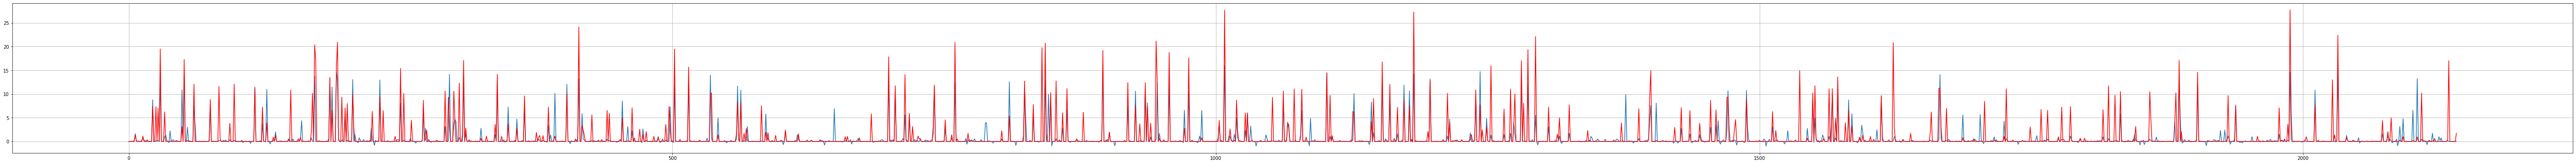

In [33]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,0])
plt.plot(range(preds.shape[0]), targs[:,0], 'r')
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [34]:
#torch.save(learn, "models/LSTM_multipoint_12p.pth")

# Test set

In [35]:
# Model class must be defined somewhere
#model = torch.load("models/LSTM_multipoint_12p.pth")
#model.eval()

LSTM(
  (lstm): LSTM(1, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=12, bias=True)
)

In [48]:
learn = load_learner("models/LSTM_multipoint_12p.pth", cpu=False)

In [49]:
test_data = torch.FloatTensor(test_sequence).view(-1)

In [50]:
test_inout_seq = create_inout_sequences(test_data, train_window, out_sz)
len(test_inout_seq)

472

In [51]:
test_x_list = [x[0] for x in test_inout_seq]
test_y_list = [x[1] for x in test_inout_seq]

In [52]:
test_dataset = utils.TensorDataset(torch.stack(test_x_list), torch.stack(test_y_list))
test_dataset

In [53]:
test_dls = utils.DataLoader(test_dataset, batch_size=1)
#val_dls = utils.DataLoader(val_set, batch_size=1)

#dls = DataLoaders(train_dls, val_dls)

In [54]:
#learn = Learner(test_dls, model, loss_func=multiPointLoss)

In [55]:
preds,targs = learn.get_preds(dl=test_dls)

In [56]:
preds.shape

torch.Size([472, 12])

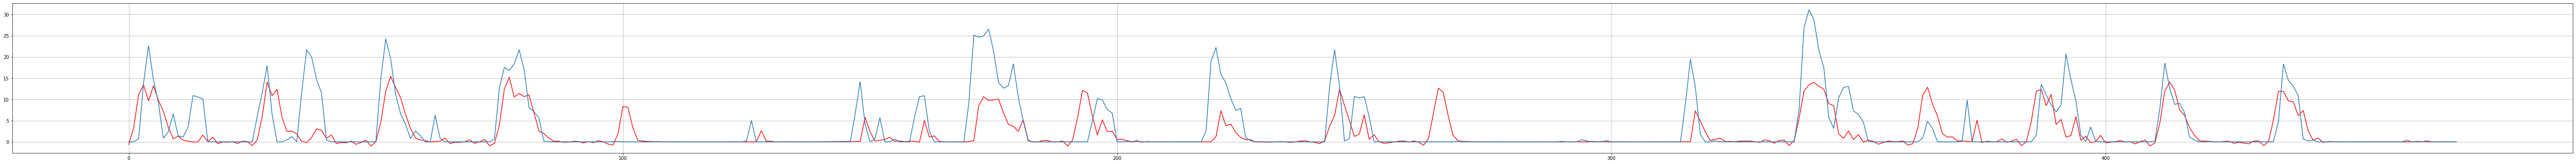

In [57]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,0], 'r')
plt.plot(range(preds.shape[0]), targs[:,0])
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

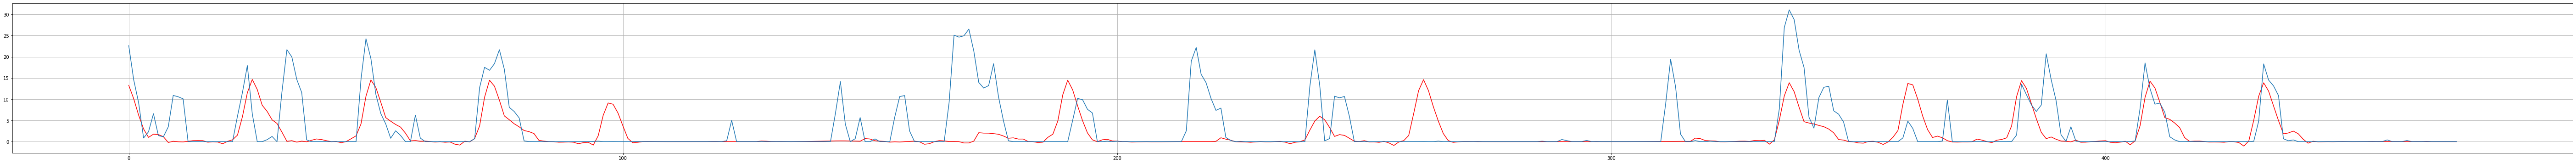

In [58]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,4], 'r')
plt.plot(range(preds.shape[0]), targs[:,4])
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [59]:
multiPointLoss(targs, preds)

tensor(5.4761)

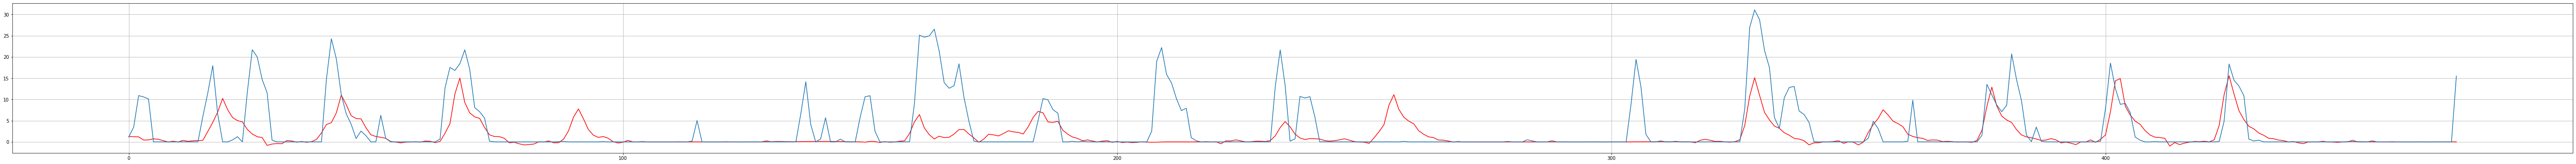

In [60]:
plt.figure(figsize=(100,6))
plt.plot(range(preds.shape[0]), preds[:,11], 'r')
plt.plot(range(preds.shape[0]), targs[:,11])
#plt.ylabel('Day Power')
#plt.legend(['Real Power', 'Predicted Power'])
plt.grid()
plt.show()

In [61]:
# Custom loss for multi-point forecasting

def multiPointLoss_hours(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = F.mse_loss(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = torch.sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = torch.sqrt(s / (actual.shape[0] * actual.shape[1]))
    return scores

In [62]:
multiPointLoss_hours(targs, preds)

[tensor(4.8932),
 tensor(5.3652),
 tensor(5.5090),
 tensor(5.5898),
 tensor(5.6376),
 tensor(5.5917),
 tensor(5.5979),
 tensor(5.5870),
 tensor(5.5554),
 tensor(5.4902),
 tensor(5.4362),
 tensor(5.4199)]